In [2]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt # for making figures
%matplotlib inline

In [4]:
words = open('names.txt', 'r').read().splitlines()

In [5]:
def give_index(c):
  if c == '<S>':
    return 26
  elif c == '<E>':
    return 27
  else:
    return ord(c) - 97

In [5]:
x = []
y = []
context_len = 3 # number of chars u want to use to predict next char
for word in words[:1]:
    chs = ['<S>']*context_len + list(word) + ['<E>']
    for i1,i2,i3,out in zip(chs, chs[1:], chs[2:], chs[3:]):
        x.append([ give_index(i1),give_index(i2),give_index(i3)  ])
        y.append(give_index(out))
        print(f"use {i1, i2, i3} to predict {out}")

use ('<S>', '<S>', '<S>') to predict e
use ('<S>', '<S>', 'e') to predict m
use ('<S>', 'e', 'm') to predict m
use ('e', 'm', 'm') to predict a
use ('m', 'm', 'a') to predict <E>


In [6]:
# test x,y
print('x =',x)
print('y =',y)

x = [[26, 26, 26], [26, 26, 4], [26, 4, 12], [4, 12, 12], [12, 12, 0]]
y = [4, 12, 12, 0, 27]


In [6]:
# architecture
# for each example

# input: 6 x 1 (3 chars, each char 2 x 1)
# input layer 6 neurons

# hidden layer
# num of neurons: 100
# weights from input to hidden: 100 x 6
# output of hidden layer: 100 x 6 @ 6 x 1 = 100 x 1(each neuron one output)


# output layer
# num of neurons: 28 (each spitting prob of 28th character)
# weights from hidden to output layer: 28 x 100
# output of output layer: 28 x 100 @ 100 x 1 = 28 x 1

# ----------------------------
# for N examples
# input: 6 x N (3 chars, each char 2 x 1)
# input layer 6 neurons

# hidden layer
# num of neurons: 100
# weights from input to hidden: 100 x 6
# output of hidden layer: 100 x 6 @ 6 x N = 100 x N(each neuron one output)


# output layer
# num of neurons: 28 (each spitting prob of 28th character)
# weights from hidden to output layer: 28 x 100
# output of output layer: 28 x 100 @ 100 x N = 28 x N


In [7]:
x = torch.tensor(x)
y = torch.tensor(y)    

In [125]:
# embeddings input
emb = torch.randn((28,2), requires_grad=True) # each word is 1 x 2 vector
emb 

tensor([[-1.9165,  0.4614],
        [ 0.0275, -0.9624],
        [ 0.0558, -0.6437],
        [-1.8776, -0.7660],
        [ 0.7986, -0.3348],
        [-0.9866, -1.4661],
        [-1.7200, -0.6349],
        [ 2.0869,  0.1334],
        [ 0.2272, -1.5672],
        [-0.2518,  0.3543],
        [ 0.7454, -3.4514],
        [ 0.4925, -1.8462],
        [-1.7644, -1.0021],
        [ 0.2661, -2.6085],
        [ 1.6288,  0.7787],
        [-1.7137, -1.2363],
        [ 0.0320,  0.9926],
        [ 1.0834, -2.7976],
        [-1.4099,  0.6822],
        [ 2.0771, -0.8089],
        [-0.8195,  0.2657],
        [-0.6958,  1.1503],
        [-1.2117,  0.9347],
        [-0.9772,  0.0831],
        [ 1.4448,  1.1502],
        [ 0.3567, -1.4130],
        [ 1.0921, -2.4278],
        [-0.4865,  1.0043]], requires_grad=True)

In [20]:
# input layer
input_vec = emb[x] # n inputs x 3 x 2
input_vec_reshape = input_vec.view(input_vec.shape[0], 6)
input_vec_reshape_t = torch.transpose(input_vec_reshape,0,1) # n inputs x 6
print(input_vec_reshape_t.shape)

torch.Size([6, 5])


In [124]:
# hidden Layer
W1 = torch.randn(100,6,requires_grad=True) # 100 neurons, each neuron will get 6 x 1 input(3 chars, each char 2x1)
b1 = torch.randn(100,1,requires_grad=True)

output_of_hidden_layer = torch.tanh( (W1 @ input_vec_reshape_t ) + b1 )
print(output_of_hidden_layer.shape) # 100 x N

torch.Size([100, 5])


In [126]:
# output
W2 = torch.rand(28,100, requires_grad=True)
b2 = torch.rand(28,1, requires_grad=True)

output_of_output_layer = (W2 @ output_of_hidden_layer) + b2
print(output_of_output_layer.shape) # 28  X N

torch.Size([28, 5])


In [76]:
# softmax of output layer
counts = torch.exp(output_of_output_layer)
prob  = counts / counts.sum(0, keepdims=True)
print(prob.shape) 
# for each of 5 inputs, each column gives the prob of rth character, r is neuron index
# r neurons spits prob of r index char

torch.Size([28, 5])


In [132]:
# neg log loss using pytorch
N_examples = x.shape[0]
loss = -prob[y,torch.arange(N_examples)].log().mean()
print(loss)

print( F.cross_entropy(torch.transpose(output_of_output_layer,  0,1), y) )

tensor(3.9238, grad_fn=<NegBackward0>)
tensor(3.9238, grad_fn=<NllLossBackward0>)


In [ ]:
# All at one place

In [89]:
# inputs and outputs
x = []
y = []
context_len = 3 # number of chars u want to use to predict next char
for word in words:
    chs = ['<S>']*context_len + list(word) + ['<E>']
    for i1,i2,i3,out in zip(chs, chs[1:], chs[2:], chs[3:]):
        x.append([ give_index(i1),give_index(i2),give_index(i3)  ])
        y.append(give_index(out))
#         print(f"use {i1, i2, i3} to predict {out}")

x = torch.tensor(x)
y = torch.tensor(y)    

In [90]:
# parmeters
emb = torch.randn((28,2), requires_grad=True) # each word is 1 x 2 vector
W1 = torch.randn(100,6,requires_grad=True) # 100 neurons, each neuron will get 6 x 1 input(3 chars, each char 2x1)
b1 = torch.randn(100,1,requires_grad=True)
W2 = torch.rand(28,100, requires_grad=True)
b2 = torch.rand(28,1, requires_grad=True)

In [91]:
# all params at one place
all_params = [emb, W1, b1, W2, b2]

loss =  2.507465124130249


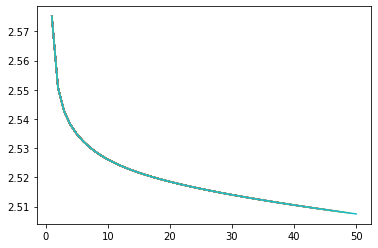

In [11]:
# forward and backward pass in loop
loss_over_time = []
for _ in range(50):
    # forward pass
    input_vec = emb[x] # n inputs x 3 x 2
    input_vec_reshape = input_vec.view(input_vec.shape[0], 6)
    input_vec_reshape_t = torch.transpose(input_vec_reshape,0,1) # n inputs x 6
    
    output_of_hidden_layer = torch.tanh( (W1 @ input_vec_reshape_t ) + b1 )
    
    output_of_output_layer = (W2 @ output_of_hidden_layer) + b2
    
    # loss
    neg_log_likehood = F.cross_entropy(torch.transpose(output_of_output_layer,  0,1), y)
    loss_over_time.append(neg_log_likehood.item())
    plt.plot(range(1,len(loss_over_time)+1),loss_over_time)

    # backward pass
    for p in all_params:
        p.grad = None
    neg_log_likehood.backward()
    

    # gradient descent
    for p in all_params:
        p.data += -0.2*p.grad
print('loss = ',loss_over_time[-1])

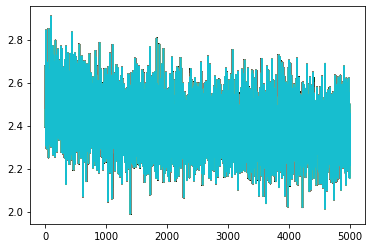

loss  2.3551459312438965


In [132]:
# using mini batch 
loss_over_time = []
for _ in range(5000):
    ix = torch.randint(0, x.shape[0], (100,))
    
    # forward pass
    input_vec = emb[x[ix]] # n inputs x 3 x 2
    input_vec_reshape = input_vec.view(input_vec.shape[0], 6)
    input_vec_reshape_t = torch.transpose(input_vec_reshape,0,1) # n inputs x 6
    
    output_of_hidden_layer = torch.tanh( (W1 @ input_vec_reshape_t ) + b1 )
    
    output_of_output_layer = (W2 @ output_of_hidden_layer) + b2
    
    # loss
    neg_log_likehood = F.cross_entropy(torch.transpose(output_of_output_layer,  0,1), y[ix])
    loss_over_time.append(neg_log_likehood.item())
    plt.plot(range(1,len(loss_over_time)+1),loss_over_time)

    # backward pass
    for p in all_params:
        p.grad = None
    neg_log_likehood.backward()
    

    # gradient descent
    for p in all_params:
        p.data += -0.1*p.grad

plt.show()
input_vec = emb[x] # n inputs x 3 x 2
input_vec_reshape = input_vec.view(input_vec.shape[0], 6)
input_vec_reshape_t = torch.transpose(input_vec_reshape,0,1) # n inputs x 6
output_of_hidden_layer = torch.tanh( (W1 @ input_vec_reshape_t ) + b1 )
output_of_output_layer = (W2 @ output_of_hidden_layer) + b2
# loss
neg_log_likehood = F.cross_entropy(torch.transpose(output_of_output_layer,  0,1), y)
print('loss ',neg_log_likehood.item())


In [89]:
# Appendix - variable is updated when u update in loop, pass by reference
q = torch.tensor([1])
qqq = [q]
print(q)
for i in qqq:
    i = i*2

print(i)

tensor([1])
tensor([2])


In [ ]:
# Notes
# ### Right way of testing model
# divide into train, dev and test set
# train to optimize parameters - weights, bias, embeddings
# test to optimize hyper params - num of neurons, embedding size

### things that can be tuned
# inc num of neurons in hidden layer
# inc dimensionality of embedding


In [20]:
emb.shape

torch.Size([28, 2])

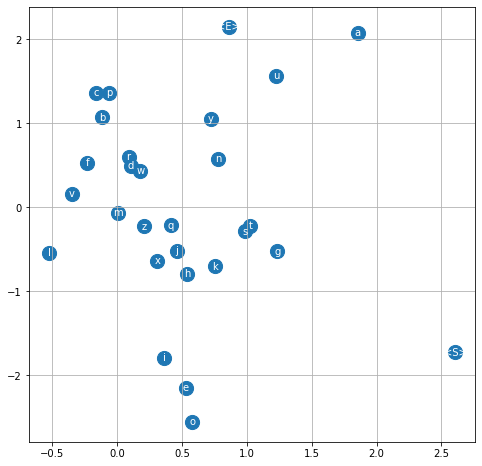

In [133]:
# visualize dimensions 0 and 1 of the embedding matrix C for all characters
def give_char(num):
    if num == 26:
        c = '<S>'
    elif num == 27:
        c = '<E>'
    else:    
        c = chr(num + 97)
    
    return c

C = emb
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), give_char(i), ha="center", va="center", color='white')
plt.grid('minor')


In [138]:
# some bug in torch.multinomial
# sample
for _ in range(10):
    out = [26,26,26]
    while True:
        input_vec = emb[out[-3:]] # n inputs x 3 x 2
        input_vec_reshape = input_vec.view(1, 6) 
        input_vec_reshape_t = torch.transpose(input_vec_reshape,0,1) # 6 x 1
        output_of_hidden_layer = torch.tanh( (W1 @ input_vec_reshape_t ) + b1 ) # 100 x 1 
        output_of_output_layer = (W2 @ output_of_hidden_layer) + b2 # 28 x 1
        counts = torch.exp(output_of_output_layer) 
        prob  = counts / counts.sum(0, keepdims=True)
        ix = torch.multinomial(torch.transpose(prob,0,1), num_samples=1, replacement=True)[0].item()
        out.append(ix)
        if ix == 27:
            break
        
    print(''.join(give_char(i) for i in out))




<S><S><S>xai<E>
<S><S><S>astin<E>
<S><S><S>mini<E>
<S><S><S>dariah<E>
<S><S><S>ramda<E>
<S><S><S>xacion<E>
<S><S><S>anamibah<E>
<S><S><S>emhoni<E>
<S><S><S>juara<E>
<S><S><S>mek<E>
